[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/12nrNwgzWtLTlmKcfaYfoWrGnT8u1FwLe?usp=sharing)

## **Week 4 - Introduction to Matplotlib - Solutions**

### **Solutions - Applying Gaussian Processes to Potential Energy Surface (PES)**

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


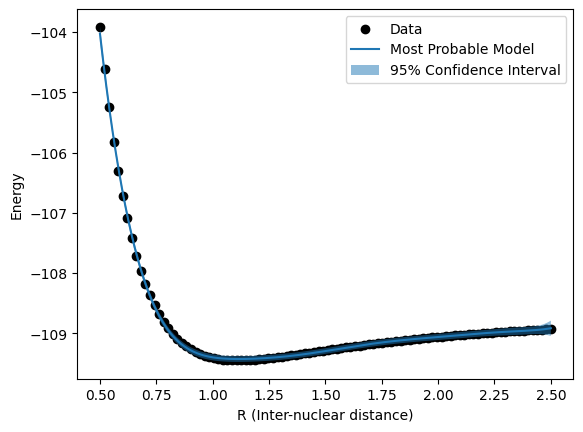

In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_url = "https://github.com/RodrigoAVargasHdz/CHEM-4PB3/raw/main/Course_Notes/data/PES_N2"
data = pd.read_csv(data_url)

# Normalize your data if necessary
X = data['R'].values.reshape(-1, 1) # scikit-learn expects 2D inputs
y = data['Energy'].values

# Define the kernel with reasonable starting parameters
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# Create Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
X_pred = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
y_pred, sigma = gp.predict(X_pred, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on the MSE
plt.figure()
plt.scatter(X, y, c='k', label='Data')
plt.plot(X_pred, y_pred, label='Most Probable Model')
plt.fill_between(X_pred[:, 0], y_pred - 1.96*sigma, y_pred + 1.96*sigma, alpha=0.5, label='95% Confidence Interval')
plt.xlabel('R (Inter-nuclear distance)')
plt.ylabel('Energy')
plt.legend()
plt.show()
